In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Loading the info data

In [2]:
data_info = pd.read_csv('./TensorFlow_FILES/DATA/lending_club_info.csv', index_col='LoanStatNew')

In [3]:
data_info.shape

(28, 1)

In [7]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [8]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [9]:
feat_info('mort_acc')

Number of mortgage accounts.


#### Loading the data

In [10]:
df = pd.read_csv('./TensorFlow_FILES/DATA/lending_club_loan_two.csv')

In [19]:
pd.set_option('display.max_columns', 40)
pd.set_option('display.max_colwidth', None)

In [20]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [11]:
df.shape

(396030, 27)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [13]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [14]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


### Section 1: Exploratory Data Analysis (EDA)

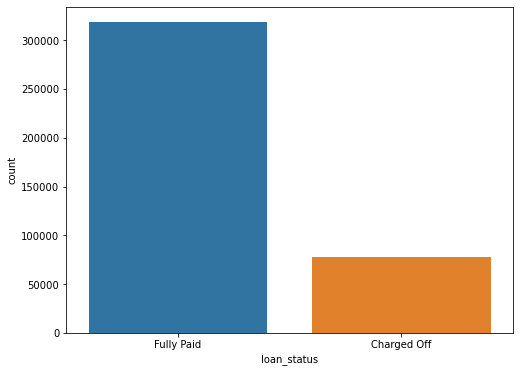

In [15]:
plt.figure(figsize = (8, 6))
sns.countplot(df['loan_status'])

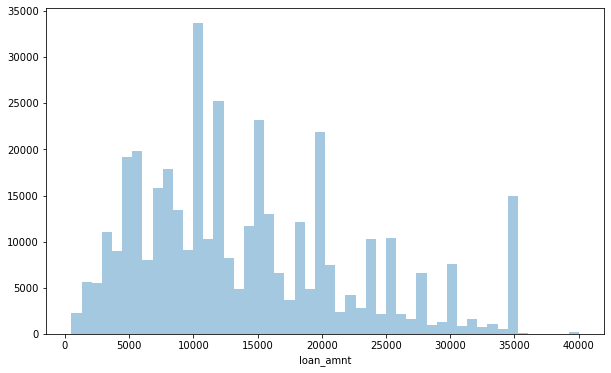

In [17]:
plt.figure(figsize = (10, 6))
sns.distplot(df['loan_amnt'], kde = False)

In [21]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


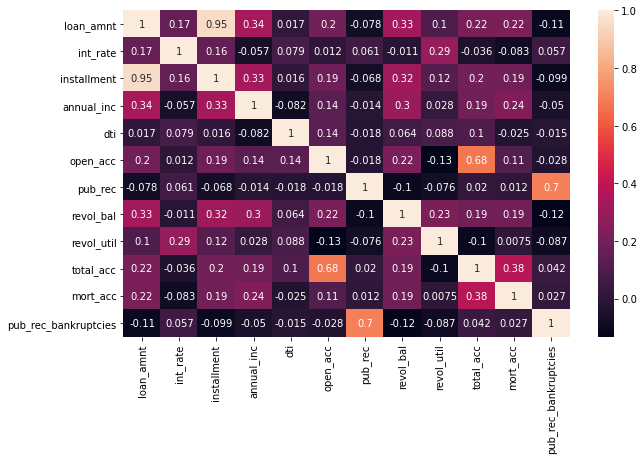

In [23]:
plt.figure(figsize = (10, 6))
sns.heatmap(df.corr(), annot = True)

In [24]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [26]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


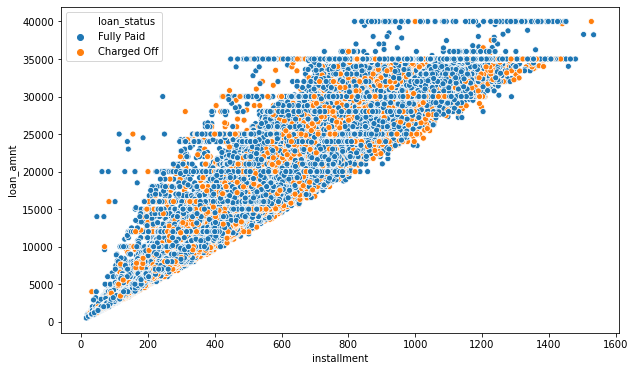

In [28]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = df['installment'], y = df['loan_amnt'], hue=df['loan_status'])

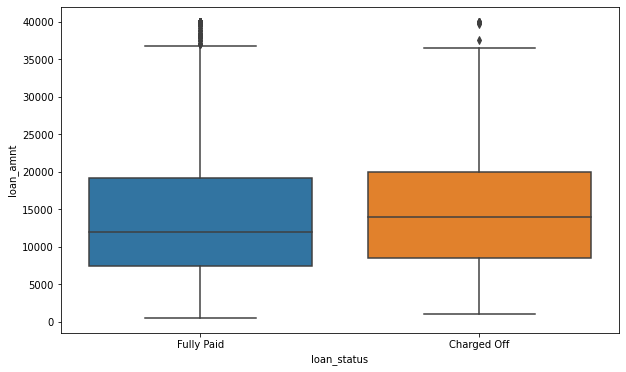

In [29]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = df)

In [32]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [36]:
print(df['grade'].sort_values().unique())

['A' 'B' 'C' 'D' 'E' 'F' 'G']


In [38]:
feat_info('sub_grade')

LC assigned loan subgrade


In [39]:
print(df['sub_grade'].sort_values().unique())

['A1' 'A2' 'A3' 'A4' 'A5' 'B1' 'B2' 'B3' 'B4' 'B5' 'C1' 'C2' 'C3' 'C4'
 'C5' 'D1' 'D2' 'D3' 'D4' 'D5' 'E1' 'E2' 'E3' 'E4' 'E5' 'F1' 'F2' 'F3'
 'F4' 'F5' 'G1' 'G2' 'G3' 'G4' 'G5']


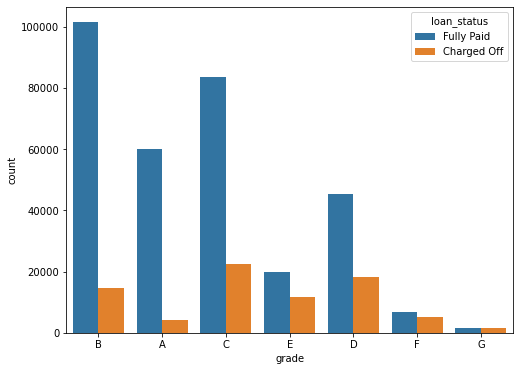

In [41]:
plt.figure(figsize = (8, 6))
sns.countplot(x = 'grade', data = df, hue = 'loan_status')

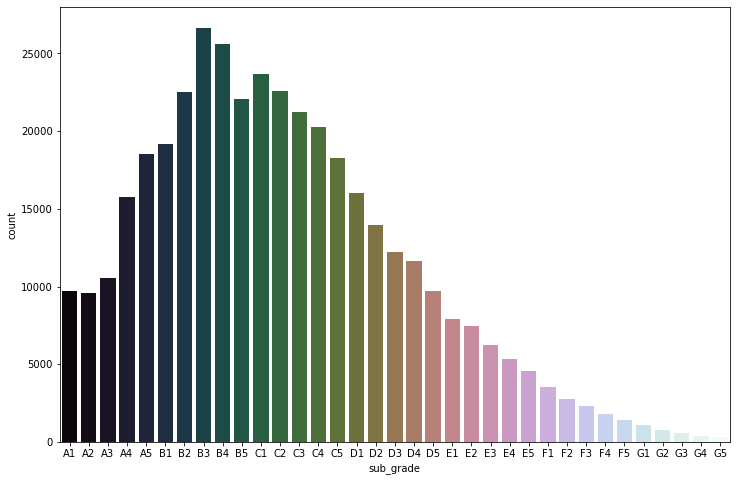

In [47]:
plt.figure(figsize = (12, 8))
sns.countplot(x = df['sub_grade'].sort_values(), data = df, palette='cubehelix')

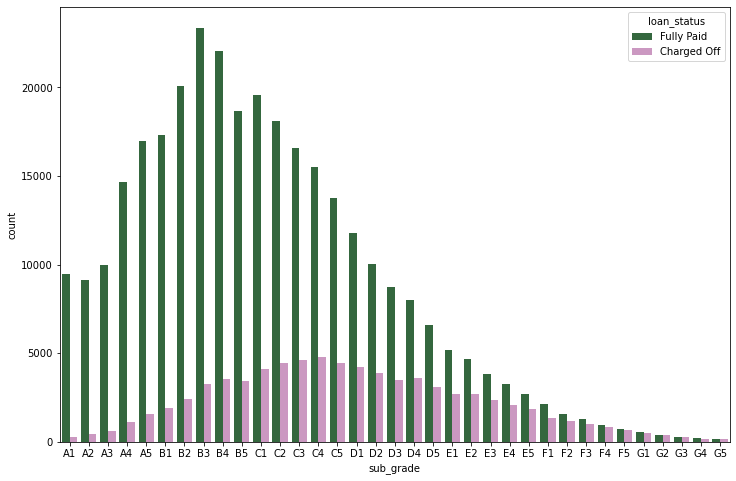

In [48]:
plt.figure(figsize = (12, 8))
sns.countplot(x = df['sub_grade'].sort_values(), data = df, hue = 'loan_status', palette='cubehelix')

In [61]:
f_g_df = df[(df['sub_grade'].isin(['F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3' ,'G4', 'G5']))]

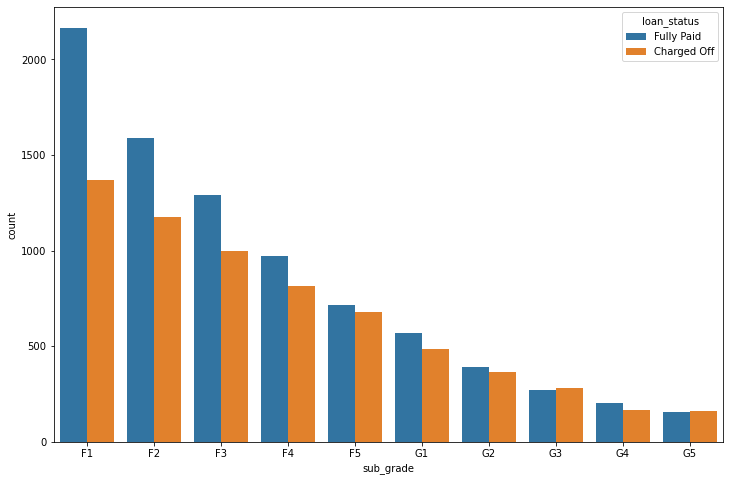

In [63]:
plt.figure(figsize = (12, 8))
sns.countplot(f_g_df['sub_grade'].sort_values(), hue = f_g_df['loan_status'])

In [65]:
df['loan_repaid'] = df['loan_status'].apply(lambda x: 1 if x == 'Fully Paid' else 0)

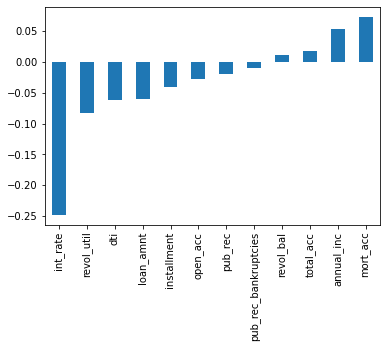

In [70]:
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind = 'bar')

### Section 2: Data Preprocessing

In [71]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [73]:
df.shape[0]

396030

In [75]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [77]:
df.isna().sum()/len(df) * 100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [78]:
feat_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [79]:
feat_info('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [81]:
df['emp_title'].nunique()

173105

In [82]:
df['emp_title'].value_counts()

Teacher                          4389
Manager                          4250
Registered Nurse                 1856
RN                               1846
Supervisor                       1830
                                 ... 
A.E. Gombert Lumber CO., INC.       1
dr james freeman                    1
Cpl. Detentions                     1
Parexel International               1
night clerk                         1
Name: emp_title, Length: 173105, dtype: int64

In [83]:
df = df.drop('emp_title', axis = 'columns')

In [88]:
print(df['emp_length'].sort_values().unique())

['1 year' '10+ years' '2 years' '3 years' '4 years' '5 years' '6 years'
 '7 years' '8 years' '9 years' '< 1 year' nan]


<Figure size 864x576 with 0 Axes>

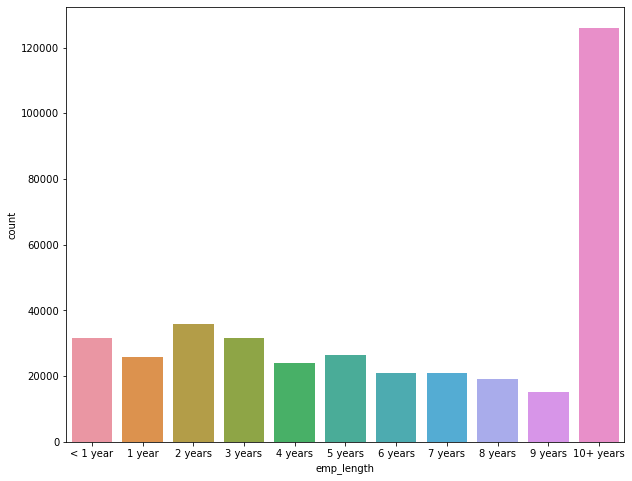

In [98]:
plt.figure(figsize=(10, 8))
sns.countplot(df['emp_length'].sort_values(), order = ['< 1 year','1 year', '2 years', '3 years', '4 years', '5 years', '6 years',\
                                                       '7 years', '8 years', '9 years', '10+ years'])

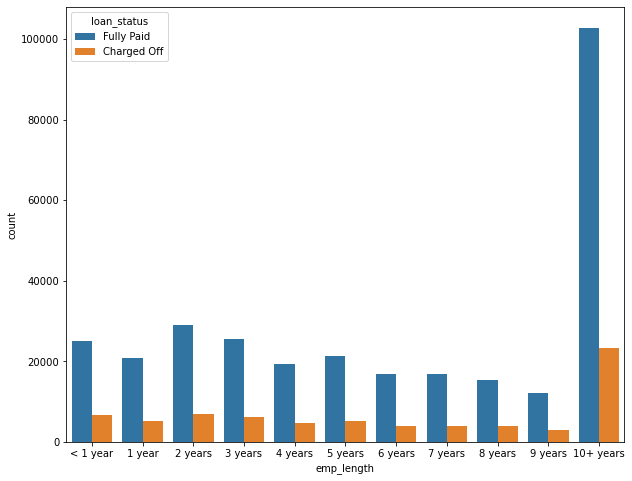

In [99]:
plt.figure(figsize=(10, 8))
sns.countplot(df['emp_length'].sort_values(), order = ['< 1 year','1 year', '2 years', '3 years', '4 years', '5 years', '6 years',\
                                                       '7 years', '8 years', '9 years', '10+ years'], hue = df['loan_status'])

In [126]:
len(df.dropna(subset = ['emp_length']))

377729

In [138]:
emp_co = df[df['loan_status']=='Charged Off'].groupby('emp_length')['loan_status'].count()

In [136]:
emp_fp = df[df['loan_status']=='Fully Paid'].groupby('emp_length')['loan_status'].count()

In [141]:
emp = emp_co/emp_fp

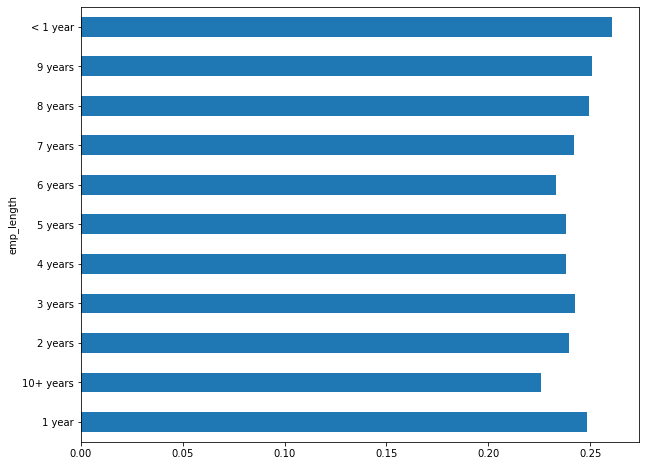

In [143]:
plt.figure(figsize=(10, 8))
emp.plot(kind = 'barh')

In [145]:
df = df.drop(['emp_length'], axis = 1)

In [146]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [147]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [148]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [149]:
df = df.drop('title', axis = 'columns')

In [153]:
feat_info('mort_acc')

Number of mortgage accounts.


In [154]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [159]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [161]:
df['total_acc'].head()

0    25.0
1    27.0
2    26.0
3    13.0
4    43.0
Name: total_acc, dtype: float64

In [164]:
df.groupby('total_acc')['mort_acc'].mean()

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [182]:
def fill_mort_acct(mort_acct, total_acct):
    
    if np.isnan(mort_acct):
        return df.groupby(total_acct)[mort_acct].mean()[total_acct]
    else:
        return mort_acct

In [185]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [192]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

In [193]:
def fill_mort_acc(total_acc,mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    
    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [194]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [195]:
df['mort_acc'].value_counts()

0.000000     139779
1.000000      60416
2.000000      49949
3.000000      38049
4.000000      27887
              ...  
2.800000          1
28.000000         1
3.278481          1
3.111111          1
3.176471          1
Name: mort_acc, Length: 110, dtype: int64

In [196]:
df.isna().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [198]:
df = df.dropna(subset=['revol_util', 'pub_rec_bankruptcies'])

In [199]:
df.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [202]:
df.select_dtypes(exclude=['int64', 'float64']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [203]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [216]:
df['term'] = df['term'].str.strip().map({'36 months' : 36, '60 months' : 60}).apply(np.int64)

/Users/martloni/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [217]:
df['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

In [218]:
df['grade'].value_counts()

B    115812
C    105775
A     64056
D     63364
E     31427
F     11740
G      3045
Name: grade, dtype: int64

In [219]:
df = df.drop('grade', axis = 'columns')

In [223]:
sub_grade = pd.get_dummies(df['sub_grade'], drop_first = True)

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  float64
 1   term                  395219 non-null  int64  
 2   int_rate              395219 non-null  float64
 3   installment           395219 non-null  float64
 4   sub_grade             395219 non-null  object 
 5   home_ownership        395219 non-null  object 
 6   annual_inc            395219 non-null  float64
 7   verification_status   395219 non-null  object 
 8   issue_d               395219 non-null  object 
 9   loan_status           395219 non-null  object 
 10  purpose               395219 non-null  object 
 11  dti                   395219 non-null  float64
 12  earliest_cr_line      395219 non-null  object 
 13  open_acc              395219 non-null  float64
 14  pub_rec               395219 non-null  float64
 15  

In [225]:
df = pd.concat([df, sub_grade], axis = 'columns')

In [226]:
df = df.drop('sub_grade', axis = 'columns')

In [227]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [228]:
dummy_df = pd.get_dummies(df[['verification_status', 'application_type', 'initial_list_status', 'purpose']], drop_first = True)

In [229]:
dummy_df.head()

,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,initial_list_status_w,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [234]:
df = pd.concat([df, dummy_df], axis = 'columns')

In [236]:
df = df.drop(['verification_status', 'application_type', 'initial_list_status', 'purpose'], axis = 'columns')

In [237]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [243]:
df['home_ownership'] = df['home_ownership'].replace({'NONE' : 'OTHER', 'ANY' : 'OTHER'})

In [244]:
df.head()

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,address,loan_repaid,A2,...,G4,G5,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,initial_list_status_w,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,10000.0,36,11.44,329.48,RENT,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1,0,...,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1,0,...,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,RENT,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1,0,...,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,RENT,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1,1,...,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0,0,...,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [245]:
df2 = df.copy()

In [252]:
df['zip_code'] = df['address'].apply(lambda x: x[-5:])

In [253]:
zip_code = pd.get_dummies(df['zip_code'], drop_first=True)

In [256]:
df = pd.concat([df, zip_code], axis = 'columns')

In [257]:
df = df.drop('zip_code', axis = 'columns')

In [258]:
home_ownership = pd.get_dummies(df['home_ownership'], drop_first = True)

In [259]:
home_ownership.head()

,OTHER,OWN,RENT
0,0,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,0,0,0


In [261]:
df = pd.concat([df, home_ownership], axis = 'columns')

In [262]:
df = df.drop('home_ownership', axis = 'columns')

In [263]:
df = df.drop('address', axis = 'columns')

In [264]:
df = df.drop('issue_d', axis = 'columns')

In [269]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda x: x.split('-')[1])

In [273]:
df['earliest_cr_year'] = df['earliest_cr_year'].apply(np.int64)

In [274]:
df = df.drop('earliest_cr_line', axis = 'columns')

In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 80 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            395219 non-null  float64
 1   term                                 395219 non-null  int64  
 2   int_rate                             395219 non-null  float64
 3   installment                          395219 non-null  float64
 4   annual_inc                           395219 non-null  float64
 5   loan_status                          395219 non-null  object 
 6   dti                                  395219 non-null  float64
 7   open_acc                             395219 non-null  float64
 8   pub_rec                              395219 non-null  float64
 9   revol_bal                            395219 non-null  float64
 10  revol_util                           395219 non-null  float64
 11  total_acc    

In [277]:
df.select_dtypes(include = ['object']).columns

Index(['loan_status'], dtype='object')

### Train Test Split

In [278]:
from sklearn.model_selection import train_test_split

In [282]:
df['loan_repaid'].value_counts()

1    317696
0     77523
Name: loan_repaid, dtype: int64

In [283]:
df['loan_status'].value_counts()

Fully Paid     317696
Charged Off     77523
Name: loan_status, dtype: int64

In [285]:
df = df.drop(['loan_status'], axis = 'columns')

In [287]:
X = df.drop('loan_repaid', axis = 'columns').values

In [289]:
y = df['loan_repaid'].values

In [312]:
df_sample = df.sample(frac=0.1, random_state = 101)

In [313]:
print(len(df_sample))
print(len(df))

39522
395219


In [314]:
X = df_sample.drop('loan_repaid', axis = 'columns').values

In [315]:
y = df_sample['loan_repaid'].values

In [316]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

### Normalizing the data

In [317]:
scaler = MinMaxScaler()

In [318]:
X_train = scaler.fit_transform(X_train)

In [319]:
X_test = scaler.transform(X_test)

### Creating a model

In [320]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [321]:
model = Sequential()

model.add(Dense(79, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(39, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(19, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [322]:
from tensorflow.keras.callbacks import EarlyStopping

In [323]:
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 25)

In [324]:
model.fit(x = X_train, y=y_train, epochs = 500, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/500
989/989 [==============================] - 2s 2ms/step - loss: 0.4252 - val_loss: 0.2926
Epoch 2/500
989/989 [==============================] - 2s 2ms/step - loss: 0.3060 - val_loss: 0.2799
Epoch 3/500
989/989 [==============================] - 2s 2ms/step - loss: 0.2905 - val_loss: 0.2791
Epoch 4/500
989/989 [==============================] - 2s 2ms/step - loss: 0.2819 - val_loss: 0.2760
Epoch 5/500
989/989 [==============================] - 2s 2ms/step - loss: 0.2786 - val_loss: 0.2754
Epoch 6/500
989/989 [==============================] - 2s 2ms/step - loss: 0.2747 - val_loss: 0.2728
Epoch 7/500
989/989 [==============================] - 2s 2ms/step - loss: 0.2733 - val_loss: 0.2738
Epoch 8/500
989/989 [==============================] - 2s 2ms/step - loss: 0.2718 - val_loss: 0.2709
Epoch 9/500
989/989 [==============================] - 2s 2ms/step - loss: 0.2710 - val_loss: 0.2721
Epoch 10/500
989/989 [==============================] - 2s 2ms/step - loss: 0.2710 - val_lo

In [325]:
model.save('lending_loan_model.h5')

### Evaluating Model performance

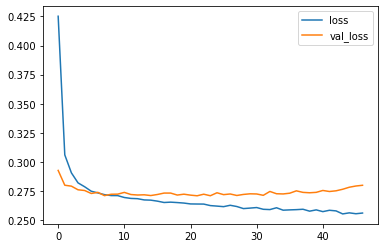

In [328]:
pd.DataFrame(model.history.history).plot()

In [345]:
from sklearn.metrics import classification_report, confusion_matrix

In [346]:
pred = model.predict_classes(X_test)

In [347]:
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      0.43      0.59      1570
           1       0.88      0.99      0.93      6335

    accuracy                           0.88      7905
   macro avg       0.91      0.71      0.76      7905
weighted avg       0.89      0.88      0.86      7905

[[ 673  897]
 [  36 6299]]


In [348]:
import random
random.seed(101)
random_ind = random.randint(0,len(df_sample))

new_customer = df_sample.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.00
term                   36.00
int_rate                7.90
installment           782.26
annual_inc          62000.00
                      ...   
93700                   0.00
OTHER                   0.00
OWN                     0.00
RENT                    0.00
earliest_cr_year     1991.00
Name: 385487, Length: 78, dtype: float64

In [349]:
new_customer = scaler.transform(new_customer.values.reshape(-1, 78))

In [351]:
model.predict_classes(new_customer)

array([[1]], dtype=int32)

In [362]:
df_sample.iloc[random_ind]['loan_repaid']

1.0